In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

In [2]:
DFproject = pd.read_csv('resultphyschem.csv')
show(DFproject)

In [3]:
show(DFproject['CharacteristicName'].value_counts())

- Each sample is tested for only one specific chemical
- Most samples are taken from the Gulf of Mexico
- Analyzing the three most tested chemicals in the dataset. Based on these concentrations, trying to dive deeper and think about how this affects marine life, and how this may impact humans like through bioaccumulation and recreational activities.
- Should we do three separate analysis for each chemical, or go in depth with just one?

- Organic carbon: Most samples tested for organic carbon. Compare ppm concentration across the Gulf of Mexico. High carbon levels can lead to ocean acidification. Based on this, see if it correlates with fish/animal populations, especially shellfish. Try to find pH data to see if the data agrees, if carbon ppm is low but pH is acidic, then maybe something else is causing the acidification.
- 2,3,3',4,5'-Pentachlorobiphenyl: Samples of pentachlorobiphenyl were taken around San Diego/Mexico. It is a manmade chemical used as an oil additive and in building materials. So we could find something like fishing or recreational data to show the frequency of human activity in/near these sample sites. Or the abundance of wildlife in/near these sample sites. 
- Phosphated pesticides: These samples were collected along the coast in Massachusetts. Phosphorus can lead to algae blooms, so we could find algae data and compare it to the sites in Massachusetts. We could compare marine life population with other nearby sites, or see if this has an impact on fishing activity

In [5]:
maskphos = (DFproject['CharacteristicName'] == 'Phosphated pesticides')
DFphos = DFproject[maskphos]
show(DFphos)

In [6]:
show(DFphos['MonitoringLocationName'].value_counts())

In [7]:
DFproject = pd.read_csv('AlexandriumAlaskanArctic_WholeCell_2018_2019.csv')
show(DFproject)

In [8]:
DFproject.shape

(336, 12)

In [9]:
DFproject.keys()

Index(['CRUISE', 'STATION_ID', 'CAST', 'LAT', 'LON', 'DATE_TIME',
       'TARGET_DEPTH', 'BOTTLE', 'CELLS_L', 'TEMP', 'SAL', 'PRESSURE'],
      dtype='object')

In [10]:
DFproject['CELLS_L'].describe()

count     336.000000
mean      372.529762
std       970.218187
min         0.000000
25%         2.000000
50%        15.500000
75%       163.500000
max      8222.000000
Name: CELLS_L, dtype: float64

In [11]:
show(DFproject['CELLS_L'].value_counts())

In [12]:
show(DFproject['CELLS_L'].describe()) 

In [13]:
show(DFproject['SAL'].value_counts())

In [14]:
show(DFproject['SAL'].value_counts())

In [15]:
show(DFproject['TEMP'].value_counts())

In [16]:
show(DFproject['PRESSURE'].value_counts())

In [17]:
mask = ['CELLS_L', 'SAL', 'TEMP', 'PRESSURE','DATE_TIME','LON','LAT']
DFproject_mask = DFproject[mask]
show(DFproject_mask)

In [18]:
DFproject_mask['years'] = DFproject_mask['DATE_TIME'].apply(lambda x: x.split('-')[0])

/var/folders/gk/h92vkc1n4mxdz8gjpgydk2zw0000gn/T/ipykernel_1338/703312956.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
DFproject_mask

,CELLS_L,SAL,TEMP,PRESSURE,DATE_TIME,LON,LAT,years
0,4,31.89,10.07,1.3,2018-08-08 09:24,-168.23420,64.67050,2018
1,0,31.17,11.44,4.0,2018-08-08 21:36,-169.14600,64.99120,2018
2,0,31.32,11.14,2.6,2018-08-09 00:35,-169.89900,64.95980,2018
3,0,31.53,11.25,2.8,2018-08-09 03:29,-169.92580,64.67180,2018
4,0,31.38,11.70,2.6,2018-08-09 06:52,-169.10020,64.68000,2018
...,...,...,...,...,...,...,...,...
331,7,29.66,6.52,2.0,2019-09-09 19:22,-157.20100,71.75100,2019
332,0,29.86,10.70,2.0,2019-09-10 16:01,-164.09134,70.25267,2019
333,0,30.35,10.66,2.0,2019-09-10 21:38,-165.48900,70.24917,2019
334,0,30.69,9.91,2.0,2019-09-11 14:57,-166.99716,70.24834,2019


In [20]:
DFproject_mask['month'] = DFproject_mask['DATE_TIME'].apply(lambda x: x.split('-')[1])
DFproject_mask

/var/folders/gk/h92vkc1n4mxdz8gjpgydk2zw0000gn/T/ipykernel_1338/847725560.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CELLS_L,SAL,TEMP,PRESSURE,DATE_TIME,LON,LAT,years,month
0,4,31.89,10.07,1.3,2018-08-08 09:24,-168.23420,64.67050,2018,08
1,0,31.17,11.44,4.0,2018-08-08 21:36,-169.14600,64.99120,2018,08
2,0,31.32,11.14,2.6,2018-08-09 00:35,-169.89900,64.95980,2018,08
3,0,31.53,11.25,2.8,2018-08-09 03:29,-169.92580,64.67180,2018,08
4,0,31.38,11.70,2.6,2018-08-09 06:52,-169.10020,64.68000,2018,08
...,...,...,...,...,...,...,...,...,...
331,7,29.66,6.52,2.0,2019-09-09 19:22,-157.20100,71.75100,2019,09
332,0,29.86,10.70,2.0,2019-09-10 16:01,-164.09134,70.25267,2019,09
333,0,30.35,10.66,2.0,2019-09-10 21:38,-165.48900,70.24917,2019,09
334,0,30.69,9.91,2.0,2019-09-11 14:57,-166.99716,70.24834,2019,09


In [21]:
august_mask = (DFproject_mask['month'] == '08')
DF_masked_august = DFproject_mask[august_mask]
show(DF_masked_august)

In [22]:
DFproject_mask.dtypes

CELLS_L        int64
SAL          float64
TEMP         float64
PRESSURE     float64
DATE_TIME     object
LON          float64
LAT          float64
years         object
month         object
dtype: object

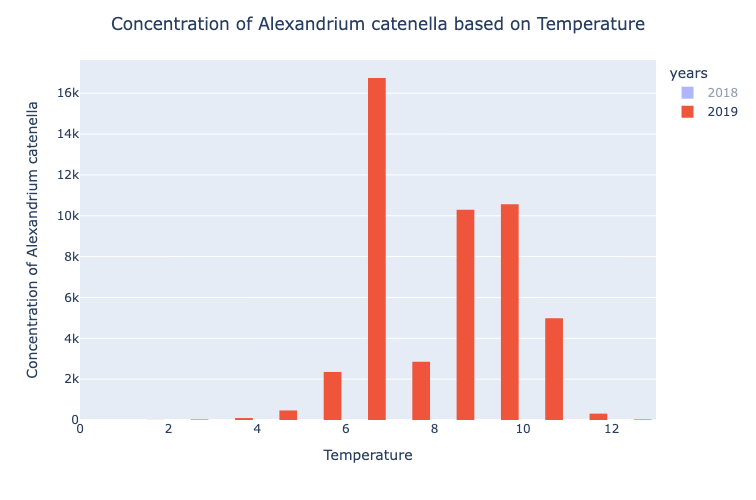

In [58]:
fig = px.histogram(DFproject_mask,
                 x='TEMP',
                 y='CELLS_L',
                color = 'years',
                nbins = 20,
                   barmode = 'group'
                )
fig.update_layout(title='Concentration of Alexandrium catenella based on Temperature',
                  title_x=0.5,
                  xaxis_title='Temperature',
                  yaxis_title='Concentration of Alexandrium catenella ',
                 autosize = False,
                width = 800,
                 height = 500)

fig.show()

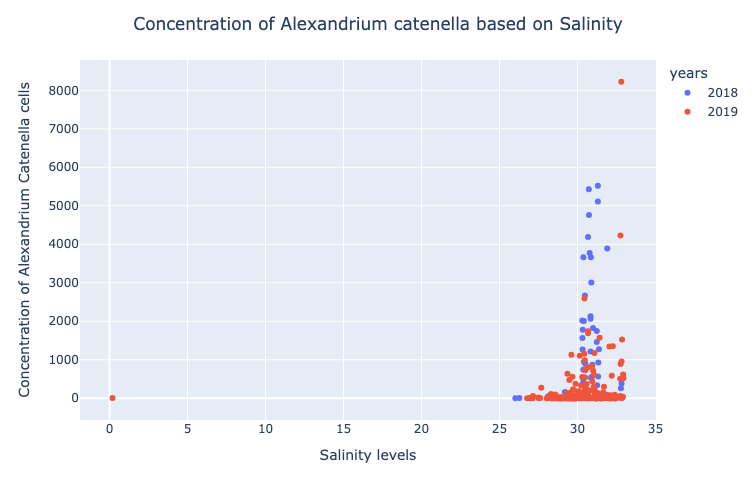

In [24]:
fig = px.scatter(DFproject_mask,
                 x='SAL',
                 y='CELLS_L',
                color = 'years',
                 #color_discrete_sequence=['black'],
                )
fig.update_layout(title='Concentration of Alexandrium catenella based on Salinity ',
                  title_x=0.5,
                  xaxis_title='Salinity levels',
                  yaxis_title='Concentration of Alexandrium Catenella cells',
                 autosize = False,
                 width = 800,
                 height = 500)

#fig.show()

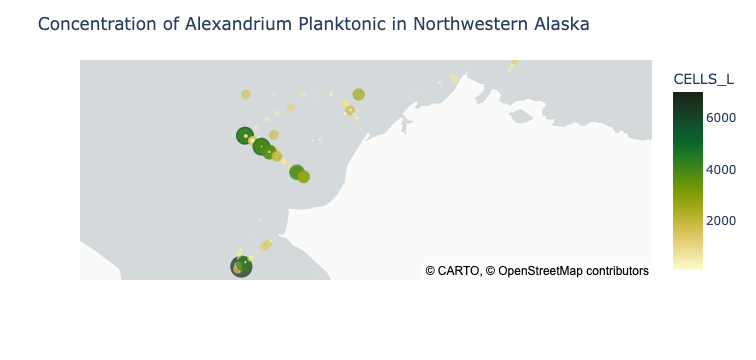

In [25]:
fig = px.scatter_map(DFproject_mask,
                 lat='LAT',
                 lon='LON',
                color = 'CELLS_L',
                size = 'CELLS_L',
                color_continuous_scale ='speed',
                size_max = 16,
                zoom = 3.7,
                range_color = [100,7000],
                height = 600)
fig.update_layout(map_style = 'light',
                  map_center_lon = -162, 
                   title = 'Concentration of Alexandrium Planktonic in Northwestern Alaska')
fig.show()